In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import  expon, gamma

In [2]:
## Methods to sample from Exponential(1)

#  von Neumann's method as described in 
# "Various Techniques Used in Connection With Random Digits" by John von Neumann -- Summary written by George E. Forsythe  
def von_neumann_exponential_original():
    K = 0
    while True:
        x = np.random.random() 
        x1 = x
        x_next = np.random.random()
        n = 1
        while x > x_next:
            x = x_next
            x_next = np.random.random() 
            n += 1
        if n % 2 != 0:          
            return K + x1
        else:
            K += 1


# Clipped rejection-sampling method (assumes that the supremum of exp(-x) is 1)
def rejection_sampling_with_exp():
    while True:
        w = np.random.uniform(0, 20)  # 20 is arbitrary but should be large enough        
        u = np.random.random()
        if u <= np.exp(-w):
            return w

In [3]:
## Method to sample from Gamma(2,\theta) -- as required by the geo-ind algorithm

def gamma_2_theta_log_free(k, theta, size=10000):
    assert k == 2 # for simplicity we only consider the case k==2
    samples = []
    # Gamma(2, 1) is the sum of two Exponential(1) variables 
    # If X ~ Gamma(2,1), then \theta*X ~ Gamma(2,\theta)
    for _ in range(size):
        samples.append((von_neumann_exponential_original() + von_neumann_exponential_original())*theta)
    return np.array(samples)

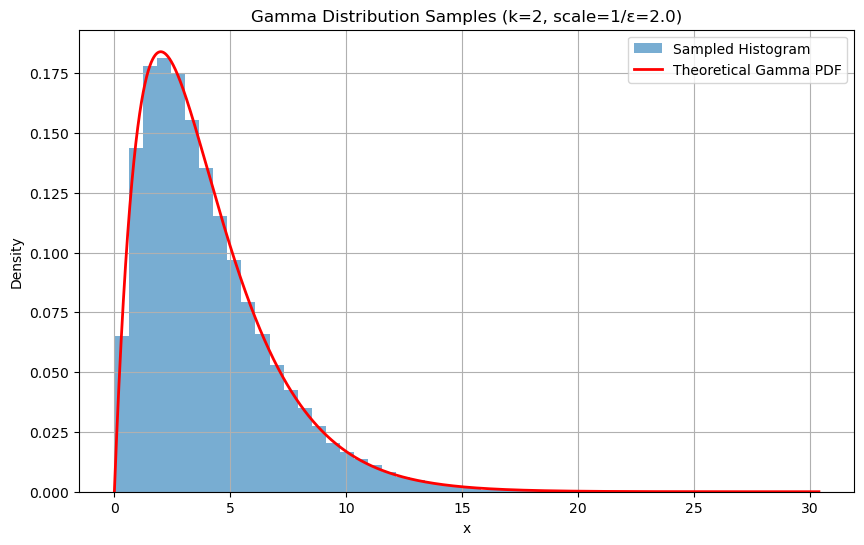

In [4]:
# Parameters
k = 2  # shape
epsilon = 0.5  # user-defined epsilon > 0
theta = 1 / epsilon  # scale


# Generate samples
samples = gamma_2_theta_log_free(k, theta, size=100000)


# Plot histogram and theoretical PDF
x = np.linspace(0, np.max(samples), 10000)
pdf = gamma.pdf(x, a=k, scale=theta)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Sampled Histogram')
plt.plot(x, pdf, 'r-', lw=2, label='Theoretical Gamma PDF')
plt.title(f'Gamma Distribution Samples (k={k}, scale=1/ε={theta})')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


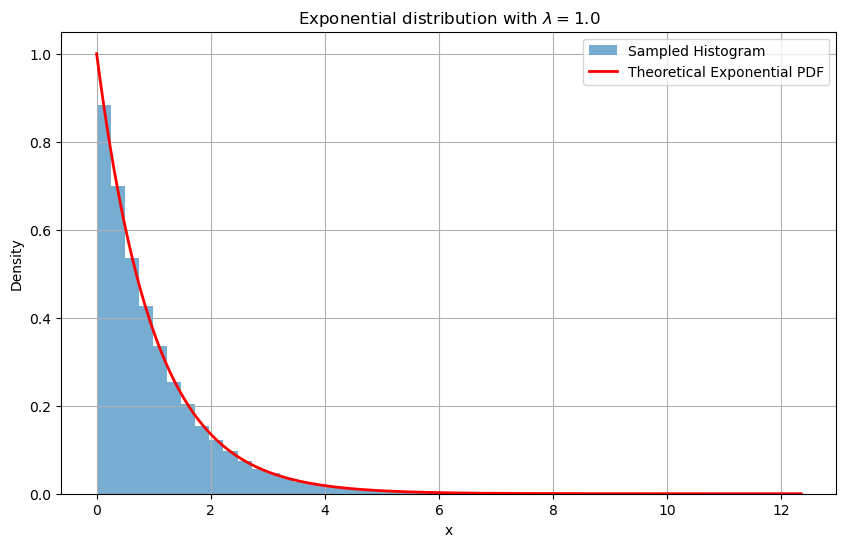

In [5]:
# Generate samples
samples = np.array([von_neumann_exponential_original() for i in range(100000)])

# Plot histogram and theoretical PDF
x = np.linspace(0, np.max(samples), 10000)
pdf = expon.pdf(x, scale=1)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Sampled Histogram')
plt.plot(x, pdf, 'r-', lw=2, label='Theoretical Exponential PDF')
plt.title(f'Exponential distribution with $\\lambda = 1.0$')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()